In [40]:
# pip install "stable-baselines3[extra]>=2.0.0a4"

from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.monitor import Monitor

from stable_baselines3.common.vec_env import VecMonitor

# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("BreakoutNoFrameskip-v4", n_envs=4, seed=0)
# Stack 4 frames
env = VecMonitor(VecFrameStack(env, n_stack=4), filename="test_log")

model = A2C("CnnPolicy", env, verbose=1)
# logs = model.learn(total_timesteps=1e4)

# model.save("a2c_pong")

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
import sys

orig_stdout = sys.stdout
f = open('out.txt', 'w')
sys.stdout = f

for i in range(2):
    model.learn(total_timesteps=6e5)

sys.stdout = orig_stdout
f.close()

In [47]:
f = open('out.txt', 'r')
lines = f.readlines()

for l in lines:
    if "ep_rew_mean" in l:
        print(float(l.split('|')[2]))


0.2777778
0.33
0.39
0.38
0.36
0.3392857
0.3
0.21
0.23
0.22


In [39]:
# print(logs)

In [31]:
import pandas as pd

df = pd.read_csv("test_log.monitor.csv", header=1)
df.head(20)
# print(df['r'].max())

,r,l,t
0,0.0,23,0.469795
1,0.0,23,0.469795
2,0.0,23,0.469795
3,0.0,23,0.469795
4,0.0,21,0.767113
5,0.0,23,0.814998
6,0.0,23,0.814998
7,0.0,21,1.189724
8,0.0,23,1.210043
9,0.0,21,1.499998


In [34]:
print(df['l'].max())

98


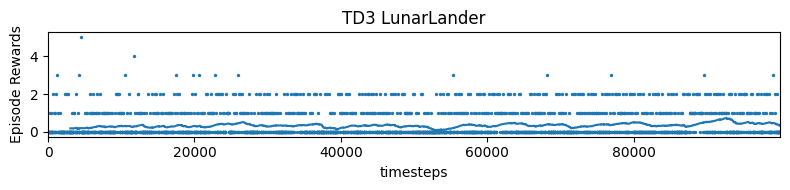

In [35]:
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt

# Helper from the library
results_plotter.plot_results(
    ["test_log"], 1e5, results_plotter.X_TIMESTEPS, "TD3 LunarLander"
)


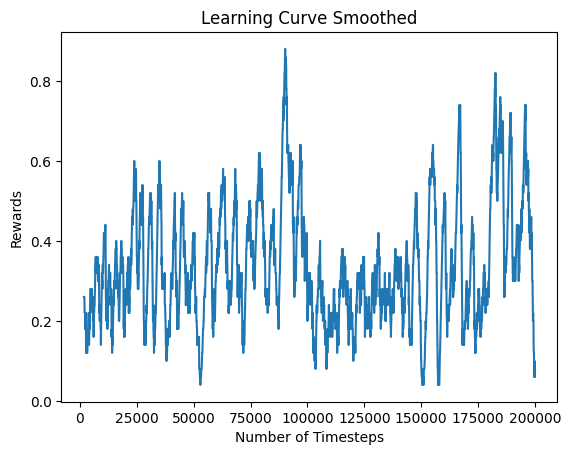

In [36]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x)-len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()
    
plot_results("test_log")

In [1]:
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-1.8.0-py3-none-any.whl (174 kB)
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-2.0.1-cp39-cp39-win_amd64.whl (10.7 MB)
  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached ale_py-0.7.4-cp39-cp39-win_amd64.whl (904 kB)
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     --------------------------------------- 0.0/38.2 MB 960.0 kB/s eta 0:00:40
     ---------------------------------------- 0.1/38.2 MB 1.4 MB/s eta 0:00:27
     ---------------------------------------- 0.3/38.2 MB 1.9 MB/s eta 0:00:21
     ---------------------------------------- 0.4/38.2 MB 2.1 MB/s eta 0:00:19
      --------------------------------------- 0.5/38.2 MB 2.2 MB/s eta 0:00:18
      --------------------------------------- 0.6/38.2 MB 2.1 MB/s eta 0:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bertopic 0.12.0 requires hdbscan>=0.8.28, which is not installed.
bertopic 0.12.0 requires plotly>=4.7.0, which is not installed.
bertopic 0.12.0 requires scikit-learn>=0.22.2.post1, which is not installed.
bertopic 0.12.0 requires pyyaml<6.0, but you have pyyaml 6.0 which is incompatible.
